# 3. Program syntax, _request(), and prompt-based programming

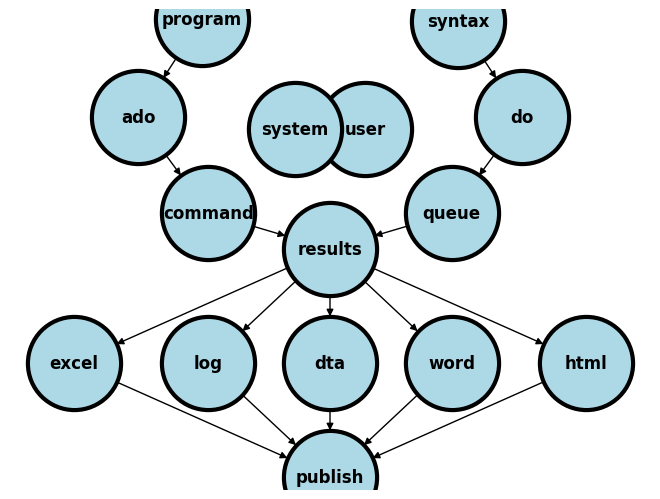

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
#import numpy as np
#import sklearn as skl
# 

#plt.figure(figsize=[2, 2])
G = nx.DiGraph()
G.add_node("user",  pos = (550,500) )
G.add_node("system",  pos = (-550,500) )
G.add_node("program",  pos = (-2000, 960) )
G.add_node("syntax",  pos = (2000, 950) )
G.add_node("ado", pos = (-3000, 550) )
G.add_node("do", pos = (3000, 550) )
G.add_node("command", pos = (-1900, 150) )
G.add_node("queue", pos = (1900, 150) )
G.add_node("results", pos = (0,0))
G.add_node("dta", pos = (0, -475))
G.add_node("log", pos = (-1900, -475))
G.add_node("excel", pos = (-4000, -475))
G.add_node("word", pos = (1900, -475))
G.add_node("html", pos = (4000, -475))
G.add_node("publish", pos = (0, -950))
G.add_edges_from([ ("program","ado"), ("syntax", "do")])
G.add_edges_from([("ado", "command"), ("do", "queue") ])
G.add_edges_from([("command", "results"), ("queue", "results"),("results","excel"),("results","word"),("results","html")])
G.add_edges_from([("results","dta"),("results","log")])
G.add_edges_from([("dta","publish"),("log","publish"),("excel","publish"),("word","publish"),("html","publish")])
nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 4500,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-5000, 5000])
ax.set_ylim([-1000, 1000])
plt.show()




In this section, we explore a hands-on example to illustrate the intersection of program syntax and user input, emphasizing the power of Stata's `_request()` function for creating customized, user-friendly, programs. 

### 3.1 Program syntax 

Firstly, ensure that the Stata environment is primed to accept the new program. This involves clearing any existing programs from your workspace to avoid conflicts:

```stata
capture program drop _all
program define mytable1
```

### 3.2 Engaging the User with `_request()`

Immediately, we solicit user input for their working directory— a novel approach to data scripting:

```stata
cls
di "What is your working directory? (No double-quotes necessary)" _request(path)
```

This step is critical. It makes the script flexible and user-centric, allowing for a seamless integration of local data sources.

**Question**: What kind of macro does the `_request()` generate?

#### Preparing the Data

Next, we navigate to the user-specified directory and initiate the creation of a simulated dataset. 

```stata
cd $path 
qui do https://raw.githubusercontent.com/jhustata/hw1/main/simulation.do
```

**Question**: Can you further customize this program to allow the user to select the dataset of their interest?

#### Crafting the Output

The script then transitions to creating Table 1, beginning with the setup in Excel and populating it with preliminary data:

```stata
putexcel set Table1
putexcel A1="Table 1. Demographic Characteristics of the Participants in the Main Safety Population"
```

#### Data Analysis and Representation

A closer look at the dataset allows us to filter and compute statistics relevant to our table, showcasing the script's analytical capabilities:

```stata
qui ds
di "`r(varlist)'"
sum bnt if bnt==1
local bnt_1: di r(N)
```

This snippet is pivotal—it demonstrates the script's capacity to dynamically interact with the dataset based on the conditions provided by the user (e.g. user-selected datasets and  variables). 

**Question**: Is it possible to ask the user to specify the variable of interest, say, `bnt`? How about the dataset of interest, say, `transplants.dta`?

#### Finalizing the Table

The final steps involve calculating percentages, formatting them, and inserting the results into the Excel table:

```stata
local bnt_1_fper=`bnt_1_fN'*100/`bnt_1'
local bnt_1_fper: di %3.1f `bnt_1_fper'
putexcel B2=("BNT162") B3=("N=`bnt_1'") B4=("`bnt_1_fN' (`bnt_1_fper')")
```

Use the `=` when defining a macro using arithmetic proceedures. When formatting the value of a macro, using the `: di` syntax

### 3.3 Pompt-based programming

This approach, particularly the use of `_request()`, is a paradigm shift towards more interactive and responsive statistical programming. It empowers users to tailor the analysis to their specific context, enhancing both the relevance and accuracy of the output.

**Why Use This Approach?**

- **Flexibility and Customization:** Users can tailor analyses to their specific datasets and preferences, making the script versatile across different projects.
- **Enhanced User Experience:** By engaging users through input requests, the analysis becomes a collaborative process rather than a static execution of code.

**When Might It Be Inappropriate?**

- **Automated Processing:** In scenarios requiring batch processing or automation, pausing for user input disrupts the workflow and efficiency.
- **Novice Users:** Those unfamiliar with Stata's syntax or the specific requirements of the script may find the `_request()` prompts challenging, potentially leading to errors or confusion.

In sum, while the use of `_request()` and similar interactive commands opens up new avenues for customized data analysis, it's essential to consider the context of their use carefully. They offer a powerful tool for engagement and flexibility but come with considerations for workflow integration and user expertise.

### 3.4 Lab

 <iframe width="560" height="315" src="https://www.youtube.com/embed/TgTNq6Y1J_U" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>


#### 3.4.1 Basic Markdown for Documentation

**Objective:** Familiarize yourself with [Markdown syntax](https://ashki23.github.io/markdown-latex.html) to create well-documented sections in your Markdown files. Navigate to `GitHub > Username > hw1`

1. **Task:** Add a new section in your hw3 repo titled "Introduction to Markdown."
   - **Action:** Create a new Markdown file (`index.md`) and write a brief introduction to Markdown.
   - **Code:** Use the following Markdown elements: headers, lists, emphasis (bold and italic), and links.
   - **Example:**
     ```markdown
     # Introduction to Markdown

     Markdown is a lightweight markup language with plain-text formatting syntax. Here's why it's useful:

     - **Easy to write and read:** Ideal for documentation and notes.
     - **Widely supported:** Used on platforms like GitHub and Jupyter.

     Learn more about Markdown [here](https://www.markdownguide.org).
     ```

#### 3.4.2 Linking Sections and External Resources

**Objective:** Design navigable documents with internal and external links.

1. **Task:** While still in your `hw1` GitHub repo, add internal links to other sections and external links to resources (e.g. your `hw1.do` **raw** URL).
   - **Action:** Use Markdown to link to another section within your book and to an external website.
   - **Code:** 
     - **Internal Link Example:** `[Local file](./hw1.do)`
     - **External Link Example:** `[Raw file](https://raw.githubusercontent.com/username/hw1/main/hw1.do)`


After completing these exercises, you should have a foundational understanding of how Markdown, LaTeX, and HTML can be used together to create rich, well-documented, and interactive content. You're encouraged to experiment with these tools, exploring beyond the basics to discover how they might enhance your academic, collaborative, and research projects.

#### 3.4.3 Integrating LaTeX for Mathematical Notation

**Objective:** Learn to incorporate LaTeX within Markdown files for displaying mathematical equations and symbols.

1. **Task:** While still in your `hw1` GitHub repo, ask ChatGPT or any other GPT to give you .HTML code that integrates `LaTeX` for Mathematical Notation
   - **Action:** Specifically this in double-quotes: "Here's an inline equation: $E=mc^2$".
   - **Code:** 

After completing these exercises, you should have a foundational understanding of how Markdown, LaTeX, and HTML can be used together to create rich, well-documented, and interactive content. You're encouraged to experiment with these tools, exploring beyond the basics to discover how they might enhance your academic, collaborative, and research projects.

##### Chat

- Yours Truly: get me .HTML code that will create a webpage displaying this latex: "Here's an inline equation: $E=mc^2$"

- GPT-4: Creating a webpage to display LaTeX equations, such as \(E=mc^2\), requires a method to interpret and render the LaTeX syntax. One popular library for this is MathJax, which can interpret LaTeX and display it correctly in web browsers. Here's how you can create an HTML page with your inline equation using MathJax:

```html
<!DOCTYPE html>
<html>
<head>
    <title>LaTeX Equation Display</title>
    <!-- Load MathJax -->
    <script src="https://polyfill.io/v3/polyfill.min.js?features=es6"></script>
    <script>
        window.MathJax = {
            tex: {
                inlineMath: [['$', '$'], ['\\(', '\\)']]
            },
            svg: {
                fontCache: 'global'
            }
        };
    </script>
    <script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-svg.js"></script>
</head>
<body>

<h2>LaTeX Equation in HTML</h2>
<p>Here's an inline equation: $E=mc^2$</p>

</body>
</html>
```

This HTML code does the following:
- Loads MathJax from a CDN, ensuring that it can interpret the LaTeX syntax.
- Configures MathJax to recognize dollar signs (`$`) as delimiters for inline LaTeX. This is the traditional LaTeX syntax for inline equations.
- Displays a paragraph `<p>` with your equation `E=mc^2` rendered by MathJax.

Just copy this code into <strike>an HTML file</strike> and open it with any modern web browser. You'll see your equation rendered beautifully inline with the text. This method is efficient and straightforward, making it a great choice for displaying LaTeX on the web.

Delete the line `<!DOCTYPE html>` since we're actually copying it into a `.md`file, which GitHub will build into `.html`

Look to the right margins for `Deployments > gh-pages` and click on gh-pages <a href="https://yourusername.github.io/yourproject/" style="color: green;">green</a> once you get the green light.



### 3.5 Homework Instructions

 <iframe width="560" height="315" src="https://www.youtube.com/embed/4Pq6B0IrX_g" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>


#### Overview
This assignment involves the development of a basic website and understanding the process of documentation and sharing through GitHub Pages. Please refer to the provided video tutorial to guide you through the website creation process.

#### Detailed Instructions

1. **Website Design**:
    - Task: Develop a basic website that displays the message "Hello, world!".
    - Guidance: Follow the step-by-step instructions provided in the video tutorial linked below to create your website.
    - Video Tutorial: [YouTube Video Link](https://www.youtube.com/watch?v=4Pq6B0IrX_g)

2. **Documentation and Sharing**:
    - Syntax Introduction: Familiarize yourself with the `dyndoc index.do` command, which will be used to generate the `.html` document necessary for your website.
    - Deployment: Upload the generated `index.html` file, along with any other files used in the creation process, to GitHub Pages. This will allow you to share your work publicly.

3. **Submission**:
    - Files to Submit: Please submit your `index.do` file, utilized in generating the `.html` document. Retain the original file name `index.do` for submission.
    - Announcement: Share the GitHub Pages URL of your website by posting it in the designated topic within the Stata II (Intermediate) HW3 discussion on [GitHub Discussions](https://github.com/jhufena/discussions/discussions). This step is crucial for announcing your entry into the world of web publication within the context of this course.
    - Support: Should you encounter any difficulties, engage with your peers and the teaching team through GitHub Discussions for assistance.

#### Additional Notes
- Ensure that all steps are followed diligently to achieve the best outcome.
- Collaboration and discussion with peers are encouraged to enhance the learning experience.

This assignment provides an opportunity to apply practical skills in website development and documentation. Good luck!